**Library Imports**

In [1]:
import pandas as pd
import io
import requests
import numpy as np
import os
import seaborn as sns

from scipy.stats import zscore

from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier

from matplotlib import pyplot
import matplotlib.pyplot as plot
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential, load_model

from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

from sklearn.preprocessing import LabelEncoder
from IPython.display import display

from imblearn.over_sampling import SMOTE

import tensorflow as tf

Panda Preferences

In [2]:
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

Read CSV

In [3]:
df_train = pd.read_csv("../../../../../Datasets/Flows/train.csv")
display(df_train)

,service,traffic,total_bytes,total_pkts,pkt_difference,byte_difference,total_data_pkts,payload_ratio,total_payload_volume,fwd_bwd_pkts_diff,duration_weighted_pkts,pkts_size_weighted,flow_pkts_size_weighted,header_size_ratio,total_header_size,header_size_diff,fwd_bwd_payload_tot_diff,fwd_bwd_payload_avg_diff,flow_fwd_payload_diff,flow_bwd_payload_diff,flow_payload_range,total_activity,history_originator,history_responder,proto_1,proto_2,proto_3,pkts_unidirectional_traffic_0,pkts_unidirectional_traffic_1,iat_is_unidirectional_False,iat_is_unidirectional_True,is_attack
0,0,camoverflow,-0.004437,1,-0.122899,-0.003766,0,-0.558121,-0.420430,0.000492,-0.463950,-0.033846,-0.033855,-0.288748,-0.571970,-0.304226,-0.190720,-0.181788,-0.233301,-0.304458,-0.147905,-0.427041,0,0,1,0,0,0,1,0,1,1
1,0,camoverflow,-0.004437,1,-0.122899,-0.003766,0,-0.558121,-0.420430,0.000492,-0.463950,-0.033846,-0.033855,-0.288748,-0.571970,-0.304226,-0.190720,-0.181788,-0.233301,-0.304458,-0.147905,-0.427041,0,0,1,0,0,0,1,0,1,1
2,0,netscan,-0.004437,2,-0.122899,-0.003766,0,-0.558121,-0.420430,0.000492,0.026168,-0.033846,-0.033855,-0.275309,-0.183556,-0.257187,-0.190720,-0.181788,-0.233301,-0.304458,-0.147905,-0.427041,1,1,1,0,0,1,0,0,1,1
3,0,camoverflow,-0.004437,1,-0.122899,-0.003766,0,-0.558121,-0.420430,0.000492,-0.463950,-0.033846,-0.033855,-0.288748,-0.571970,-0.304226,-0.190720,-0.181788,-0.233301,-0.304458,-0.147905,-0.427041,0,0,1,0,0,0,1,0,1,1
4,0,camoverflow,-0.004437,1,-0.122899,-0.003766,0,-0.558121,-0.420430,0.000492,-0.463950,-0.033846,-0.033855,-0.288748,-0.571970,-0.304226,-0.190720,-0.181788,-0.233301,-0.304458,-0.147905,-0.427041,0,0,1,0,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2229452,0,netscan,-0.004437,2,-0.122899,-0.003766,0,-0.558121,-0.420430,0.000492,0.024801,-0.033846,-0.033855,-0.275309,-0.183556,-0.257187,-0.190720,-0.181788,-0.233301,-0.304458,-0.147905,-0.427041,1,1,1,0,0,1,0,0,1,1
2229453,0,camoverflow,-0.004437,1,-0.122899,-0.003766,0,-0.558121,-0.420430,0.000492,-0.463950,-0.033846,-0.033855,-0.288748,-0.571970,-0.304226,-0.190720,-0.181788,-0.233301,-0.304458,-0.147905,-0.427041,0,0,1,0,0,0,1,0,1,1
2229454,0,camoverflow,-0.004437,1,-0.122899,-0.003766,0,-0.558121,-0.420430,0.000492,-0.463950,-0.033846,-0.033855,-0.288748,-0.571970,-0.304226,-0.190720,-0.181788,-0.233301,-0.304458,-0.147905,-0.427041,0,0,1,0,0,0,1,0,1,1
2229455,0,camoverflow,-0.004437,1,-0.122899,-0.003766,0,-0.558121,-0.420430,0.000492,-0.463950,-0.033846,-0.033855,-0.288748,-0.571970,-0.304226,-0.190720,-0.181788,-0.233301,-0.304458,-0.147905,-0.427041,0,0,1,0,0,0,1,0,1,1


In [4]:
df_test = pd.read_csv("../../../../../Datasets/Flows/test.csv")
display(df_test)

,service,traffic,total_bytes,total_pkts,pkt_difference,byte_difference,total_data_pkts,payload_ratio,total_payload_volume,fwd_bwd_pkts_diff,duration_weighted_pkts,pkts_size_weighted,flow_pkts_size_weighted,header_size_ratio,total_header_size,header_size_diff,fwd_bwd_payload_tot_diff,fwd_bwd_payload_avg_diff,flow_fwd_payload_diff,flow_bwd_payload_diff,flow_payload_range,total_activity,history_originator,history_responder,proto_1,proto_2,proto_3,pkts_unidirectional_traffic_0,pkts_unidirectional_traffic_1,iat_is_unidirectional_False,iat_is_unidirectional_True,is_attack
0,0,camoverflow,-0.004437,1,-0.122899,-0.003766,0,-0.558121,-0.420430,0.000492,-0.463950,-0.033846,-0.033855,-0.288748,-0.571970,-0.304226,-0.190720,-0.181788,-0.233301,-0.304458,-0.147905,-0.427041,0,0,1,0,0,0,1,0,1,1
1,0,camoverflow,-0.004437,1,-0.122899,-0.003766,0,-0.558121,-0.420430,0.000492,-0.463950,-0.033846,-0.033855,-0.288748,-0.571970,-0.304226,-0.190720,-0.181788,-0.233301,-0.304458,-0.147905,-0.427041,0,0,1,0,0,0,1,0,1,1
2,0,netscan,-0.004437,2,-0.122899,-0.003766,0,-0.558121,-0.420430,0.000492,0.026463,-0.033846,-0.033855,-0.275309,-0.183556,-0.257187,-0.190720,-0.181788,-0.233301,-0.304458,-0.147905,-0.427041,1,1,1,0,0,1,0,0,1,1
3,0,netscan,-0.004437,2,-0.122899,-0.003766,0,-0.558121,-0.420430,0.000492,0.027309,-0.033846,-0.033855,-0.275309,-0.183556,-0.257187,-0.190720,-0.181788,-0.233301,-0.304458,-0.147905,-0.427041,1,1,1,0,0,1,0,0,1,1
4,0,camoverflow,-0.004437,1,-0.122899,-0.003766,0,-0.558121,-0.420430,0.000492,-0.463950,-0.033846,-0.033855,-0.288748,-0.571970,-0.304226,-0.190720,-0.181788,-0.233301,-0.304458,-0.147905,-0.427041,0,0,1,0,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
743148,0,normal,-0.004437,10,-0.122899,-0.003766,5,0.972797,0.954078,0.000492,-0.463950,-0.033846,-0.033855,3.474099,2.252854,3.458871,0.502434,-0.002324,-0.233301,0.107235,0.063188,2.391426,1,1,1,0,0,0,1,0,1,0
743149,0,camoverflow,-0.004437,1,-0.122899,-0.003766,0,-0.558121,-0.420430,0.000492,-0.463950,-0.033846,-0.033855,-0.288748,-0.571970,-0.304226,-0.190720,-0.181788,-0.233301,-0.304458,-0.147905,-0.427041,0,0,1,0,0,0,1,0,1,1
743150,0,camoverflow,-0.004437,1,-0.122899,-0.003766,0,-0.558121,-0.420430,0.000492,-0.463950,-0.033846,-0.033855,-0.288748,-0.571970,-0.304226,-0.190720,-0.181788,-0.233301,-0.304458,-0.147905,-0.427041,0,0,1,0,0,0,1,0,1,1
743151,0,camoverflow,-0.004437,1,-0.122899,-0.003766,0,-0.558121,-0.420430,0.000492,-0.463950,-0.033846,-0.033855,-0.288748,-0.571970,-0.304226,-0.190720,-0.181788,-0.233301,-0.304458,-0.147905,-0.427041,0,0,1,0,0,0,1,0,1,1


---------------------------------------

**Create Model & Train Model**

In [5]:
df_train = df_train.drop('traffic', axis=1)
df_test = df_test.drop('traffic', axis=1)

In [6]:
x_columns = df_train.columns.drop('is_attack')

le = LabelEncoder()
le.fit(df_train["is_attack"].values)

x = df_train[x_columns].values
y = df_train["is_attack"].values
y = le.transform(y)

In [7]:
x_columns_val = df_test.columns.drop('is_attack')

le = LabelEncoder()
le.fit(df_test["is_attack"].values)

x_val = df_test[x_columns].values
y_val = df_test["is_attack"].values
y_val = le.transform(y_val)

In [8]:
# Split into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42, stratify=y)

In [9]:
x_test.shape,y_test.shape

((557365, 30), (557365,))

In [10]:
x_train.shape,y_train.shape

((1672092, 30), (1672092,))

In [11]:
x_val.shape, y_val.shape

((743153, 30), (743153,))

In [12]:
import numpy as np

# Random state definition
random_state=42
np.random.seed(random_state)

In [13]:
from sklearn import metrics

# Classification Metrics: Accuracy, Recall, Precision & F1Score
def compute_metrics(y_test, pred):
    print('Accuracy:', metrics.accuracy_score(y_test, pred))
    print('Recall:', metrics.recall_score(y_test, pred, average = 'weighted'))
    print('Precision:', metrics.precision_score(y_test, pred, average = 'weighted'))
    print('F1-Score:', metrics.f1_score(y_test, pred, average = 'weighted'))

In [14]:
# Extra Trees Classifier
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

def extra_tree_classifier(x_train, y_train, x_columns):
    # Usage of ExtraTreesClassifier for feature selection
    extra_tree_forest = ExtraTreesClassifier(n_estimators=5, criterion='entropy', max_features=2, random_state=random_state)
    extra_tree_forest.fit(x_train, y_train)
    feature_importances = extra_tree_forest.feature_importances_
    feature_importance_normalized = np.std([tree.feature_importances_ for tree in  extra_tree_forest.estimators_], axis = 0)

    # Plot the feature importances
    plt.rcParams["figure.figsize"] = (70, 40)
    plt.bar(x_columns, feature_importance_normalized, align='center')
    plt.xlabel('Feature Index')
    plt.ylabel('Feature Importance')
    plt.title('Comparison of different feature importances in the current dataset')
    plt.xticks(rotation=90)
    plt.show()

In [15]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

def conf_matrix(y_test, prediction, array_dimension = 2):
    if (array_dimension == 2):
        predict_classes = np.argmax(prediction, axis = 1)
        expected_classes = np.argmax(y_test, axis = 1)
    elif (array_dimension == 1):
        predict_classes = prediction
        expected_classes = y_test
    
    cm = confusion_matrix(expected_classes, predict_classes)
    cmd = ConfusionMatrixDisplay(cm, display_labels=['Normal', 'Malicious'])

    # Plot size
    fig, ax = plt.subplots(figsize=(4,4))
    
    # Add axis labels and rotate them
    ax.set_xlabel('Predicted labels', rotation=0, labelpad=10, fontsize=11)
    ax.set_ylabel('True labels', rotation=90, labelpad=10, fontsize=11)
    
    cmd.plot(ax=ax, cmap=plt.cm.Blues, colorbar=False)

    ax.set_xticks([0, 1])
    ax.set_yticks([0, 1])
    ax.set_xticklabels(['Normal', 'Malicious'])
    ax.set_yticklabels(['Normal', 'Malicious'])
    
    ax.tick_params(axis='x', pad=10)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='center', va='center')
    ax.tick_params(axis='y', pad=10)
    ax.set_yticklabels(ax.get_yticklabels(), rotation=90, ha='center', va='center')
    
    # Adjust colorbar size
    cax = plt.gcf().axes[-1]
    cax.tick_params(labelsize=11)  # Adjust the font size of colorbar labels
    cax = fig.add_axes([ax.get_position().x1+0.03,ax.get_position().y0,0.02,ax.get_position().height])
    plt.colorbar(cmd.im_, cax=cax)    

In [16]:
def plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None, normalize=False):
    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshowac(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    
    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=90)
        plt.yticks(tick_marks, target_names)
        
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

[METRICS] Logistic Regression Classifier
Accuracy: 0.9987256998222439
Recall: 0.9987256998222439
Precision: 0.9987285660318616
F1-Score: 0.99872638204742

[CMATRIX] Logistic Regression Confusion Matrix
CPU times: user 8min 3s, sys: 12min 38s, total: 20min 41s
Wall time: 1min 23s


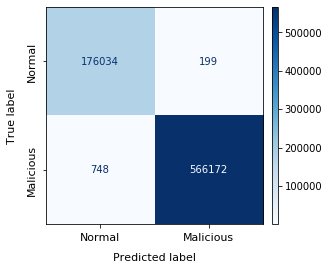

In [17]:
%%time

# Algorithm: LOGISTIC REGRESSION
import numpy as np
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression(random_state=random_state, solver='lbfgs', max_iter=5000)
logistic.fit(x_train, y_train)
logistic_prediction = logistic.predict(x_val)

print(f'[METRICS] Logistic Regression Classifier')
compute_metrics(y_val, logistic_prediction)

print(f'\n[CMATRIX] Logistic Regression Confusion Matrix')
conf_matrix(y_val, logistic_prediction, 1)